In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit.csv')
data.head()

,Type,Year,Cathode Scenario,Location scenario,location of recycling,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($)
0,Pyro,2020,NCX,US-truck,U.S.,transport+20,4.98,5.18,-0.20
1,Hydro,2020,NCX,US-truck,U.S.,transport+20,5.52,5.18,0.34
2,Direct,2020,NCX,US-truck,U.S.,transport+20,8.05,7.52,0.53
3,Pyro,2020,NCX,US-train,U.S.,transport+20,4.98,4.89,0.09
4,Hydro,2020,NCX,US-train,U.S.,transport+20,5.52,4.89,0.63


In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit.csv')

# Fill null values in 'location of recycling' based on the condition in 'Location scenario'
data['location of recycling '] = data.apply(
    lambda row: 'U.S.' if row['Location scenario'] in ['US-truck', 'US-train'] and pd.isna(row['location of recycling '])
    else ('China' if row['Location scenario'] == 'China-truck & tanker' and pd.isna(row['location of recycling '])
    else row['location of recycling ']), axis=1)

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_profit1.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


,Type,Year,Cathode Scenario,Location scenario,location of recycling,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($)
0,Pyro,2020,NCX,US-truck,U.S.,transport+20,4.98,5.18,-0.20
1,Hydro,2020,NCX,US-truck,U.S.,transport+20,5.52,5.18,0.34
2,Direct,2020,NCX,US-truck,U.S.,transport+20,8.05,7.52,0.53
3,Pyro,2020,NCX,US-train,U.S.,transport+20,4.98,4.89,0.09
4,Hydro,2020,NCX,US-train,U.S.,transport+20,5.52,4.89,0.63


In [10]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit1.csv')
data.head()

,Type,Year,Cathode Scenario,Location scenario,location of recycling,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($)
0,Pyro,2020,NCX,US-truck,U.S.,transport+20,4.98,5.18,-0.20
1,Hydro,2020,NCX,US-truck,U.S.,transport+20,5.52,5.18,0.34
2,Direct,2020,NCX,US-truck,U.S.,transport+20,8.05,7.52,0.53
3,Pyro,2020,NCX,US-train,U.S.,transport+20,4.98,4.89,0.09
4,Hydro,2020,NCX,US-train,U.S.,transport+20,5.52,4.89,0.63


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit1.csv')

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'scenarios' column
data['scenarios'] = label_encoder.fit_transform(data['scenarios'])

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_profit2.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


,Type,Year,Cathode Scenario,Location scenario,location of recycling,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($)
0,Pyro,2020,NCX,US-truck,U.S.,19,4.98,5.18,-0.20
1,Hydro,2020,NCX,US-truck,U.S.,19,5.52,5.18,0.34
2,Direct,2020,NCX,US-truck,U.S.,19,8.05,7.52,0.53
3,Pyro,2020,NCX,US-train,U.S.,19,4.98,4.89,0.09
4,Hydro,2020,NCX,US-train,U.S.,19,5.52,4.89,0.63


In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit2.csv')

# Apply one-hot encoding to the specified columns and ensure they are encoded as 1s and 0s
data = pd.get_dummies(data, columns=['Type', 'Cathode Scenario', 'Location scenario', 'location of recycling '], drop_first=False)

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_profit3.csv', index=False)

# Display the first few rows of the updated dataset
data.head()



,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,False,False,True,False,True,False,False,True,False,True
1,2020,19,5.52,5.18,0.34,False,True,False,False,True,False,False,True,False,True
2,2020,19,8.05,7.52,0.53,True,False,False,False,True,False,False,True,False,True
3,2020,19,4.98,4.89,0.09,False,False,True,False,True,False,True,False,False,True
4,2020,19,5.52,4.89,0.63,False,True,False,False,True,False,True,False,False,True


In [17]:
data

,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,False,False,True,False,True,False,False,True,False,True
1,2020,19,5.52,5.18,0.34,False,True,False,False,True,False,False,True,False,True
2,2020,19,8.05,7.52,0.53,True,False,False,False,True,False,False,True,False,True
3,2020,19,4.98,4.89,0.09,False,False,True,False,True,False,True,False,False,True
4,2020,19,5.52,4.89,0.63,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,2050,14,4.84,5.16,-0.32,False,False,True,False,True,False,False,True,False,True
8582,2050,15,11.15,5.16,5.99,False,False,True,False,True,False,False,True,False,True
8583,2050,16,4.02,5.16,-1.14,False,False,True,False,True,False,False,True,False,True
8584,2050,18,4.41,5.16,-0.75,False,False,True,False,True,False,False,True,False,True


In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit3.csv')

# Identify numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any value in the numerical columns is outside the IQR bounds
data_cleaned = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

# Save the cleaned data to a new file
data_cleaned.to_csv('/content/drive/MyDrive/lithium_pro/lith_profit4.csv', index=False)

# Display the first few rows of the cleaned dataset
data_cleaned.head()


,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,False,False,True,False,True,False,False,True,False,True
1,2020,19,5.52,5.18,0.34,False,True,False,False,True,False,False,True,False,True
3,2020,19,4.98,4.89,0.09,False,False,True,False,True,False,True,False,False,True
4,2020,19,5.52,4.89,0.63,False,True,False,False,True,False,True,False,False,True
6,2020,19,4.98,4.22,0.76,False,False,True,False,True,True,False,False,True,False


In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit4.csv')

# Replace all True with 1 and False with 0
data = data.replace({True: 1, False: 0})

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_profit5.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


<ipython-input-23-ebcdf0a03114>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,0,0,1,0,1,0,0,1,0,1
1,2020,19,5.52,5.18,0.34,0,1,0,0,1,0,0,1,0,1
2,2020,19,4.98,4.89,0.09,0,0,1,0,1,0,1,0,0,1
3,2020,19,5.52,4.89,0.63,0,1,0,0,1,0,1,0,0,1
4,2020,19,4.98,4.22,0.76,0,0,1,0,1,1,0,0,1,0


In [24]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit5.csv')
data.head()

,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,0,0,1,0,1,0,0,1,0,1
1,2020,19,5.52,5.18,0.34,0,1,0,0,1,0,0,1,0,1
2,2020,19,4.98,4.89,0.09,0,0,1,0,1,0,1,0,0,1
3,2020,19,5.52,4.89,0.63,0,1,0,0,1,0,1,0,0,1
4,2020,19,4.98,4.22,0.76,0,0,1,0,1,1,0,0,1,0


In [25]:
data

,Year,scenarios,Virgin material value ($),Cost to recycle ($),Profit ($),Type_Direct,Type_Hydro,Type_Pyro,Cathode Scenario_LFP,Cathode Scenario_NCX,Location scenario_China-truck & tanker,Location scenario_US-train,Location scenario_US-truck,location of recycling _China,location of recycling _U.S.
0,2020,19,4.98,5.18,-0.20,0,0,1,0,1,0,0,1,0,1
1,2020,19,5.52,5.18,0.34,0,1,0,0,1,0,0,1,0,1
2,2020,19,4.98,4.89,0.09,0,0,1,0,1,0,1,0,0,1
3,2020,19,5.52,4.89,0.63,0,1,0,0,1,0,1,0,0,1
4,2020,19,4.98,4.22,0.76,0,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,2050,13,4.84,5.16,-0.32,0,0,1,0,1,0,0,1,0,1
6218,2050,14,4.84,5.16,-0.32,0,0,1,0,1,0,0,1,0,1
6219,2050,16,4.02,5.16,-1.14,0,0,1,0,1,0,0,1,0,1
6220,2050,18,4.41,5.16,-0.75,0,0,1,0,1,0,0,1,0,1


Feature Importance Scores (PCA-IG mapped to original features):
Type_Direct                               2.174265
Virgin material value ($)                 1.995465
Type_Pyro                                 1.937538
Cost to recycle ($)                       1.127116
Location scenario_US-truck                1.117374
Location scenario_China-truck & tanker    0.841526
location of recycling _China              0.841526
location of recycling _U.S.               0.841526
Cathode Scenario_NCX                      0.758868
Cathode Scenario_LFP                      0.758868
Type_Hydro                                0.431217
Year                                      0.322018
Location scenario_US-train                0.201644
scenarios                                 0.020522
dtype: float64


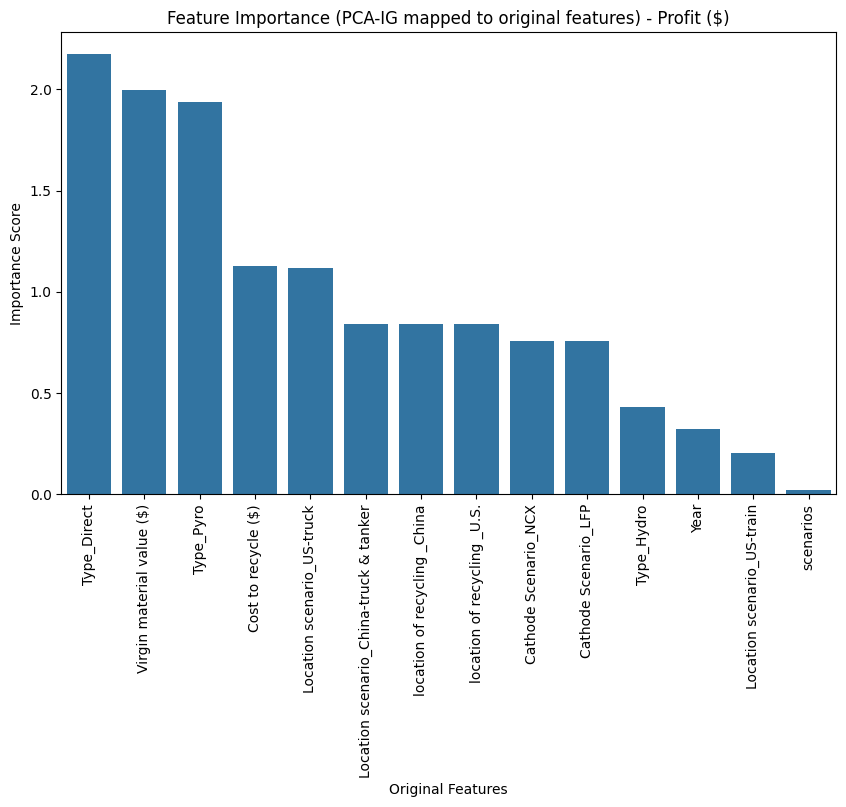


Selected Features (Threshold-Based Selection):
Type_Direct                               2.174265
Virgin material value ($)                 1.995465
Type_Pyro                                 1.937538
Cost to recycle ($)                       1.127116
Location scenario_US-truck                1.117374
Location scenario_China-truck & tanker    0.841526
location of recycling _China              0.841526
location of recycling _U.S.               0.841526
Cathode Scenario_NCX                      0.758868
Cathode Scenario_LFP                      0.758868
Type_Hydro                                0.431217
Year                                      0.322018
Location scenario_US-train                0.201644
scenarios                                 0.020522
dtype: float64

Selected Top-10 Features:
Type_Direct                               2.174265
Virgin material value ($)                 1.995465
Type_Pyro                                 1.937538
Cost to recycle ($)                       1

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold  # Use KFold for regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_profit4.csv')

# Split features and target
X = data.drop('Profit ($)', axis=1)
y = data['Profit ($)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features) - Profit ($)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Use KFold instead of StratifiedKFold

# Threshold-Based Selection
threshold = 0.002
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')  # Use negative MSE for regression
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a regressor (e.g., RandomForestRegressor)
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)


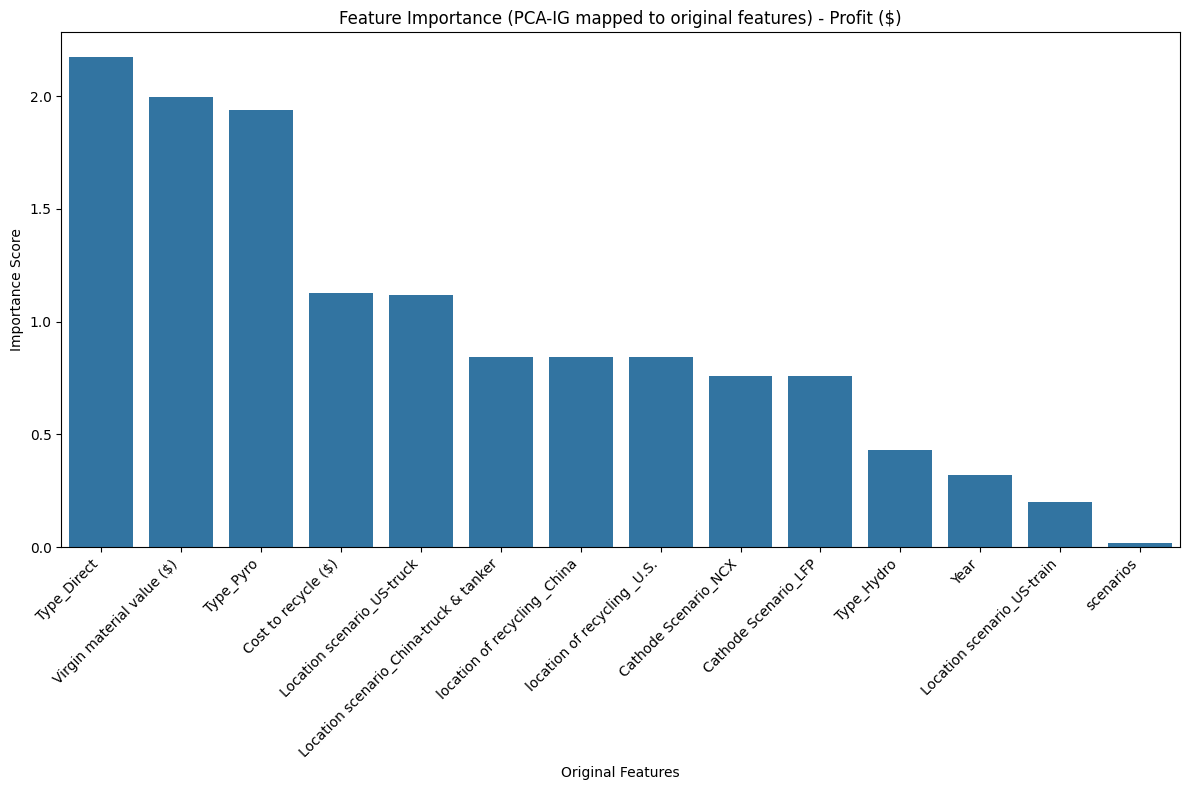

In [34]:
# Plot the feature importance using PCA-IG
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features) - Profit ($)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate feature names by 45 degrees and align them to the right

# Use tight_layout to avoid cutting off labels
plt.tight_layout()

# Save the plot as a PDF with 600 dpi
plt.savefig('/content/drive/MyDrive/lithium_pro/feature_importance_profit_plot.pdf', dpi=700)

# Show the plot
plt.show()
